<a href="https://colab.research.google.com/github/FahadNafeesAhmed/HotoDog-Detection/blob/main/Computer_Vision_Problem_AU_Toronto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install ultralytics opencv-python matplotlib


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/hotdog.zip"
extract_path = "/content/HotDogDataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check folder structure
os.listdir(extract_path)



['Hot Dog Detection YOLO']

In [ ]:
!ls "/content/drive/MyDrive/"hotdog.zip


/content/drive/MyDrive/hotdog.zip


In [ ]:
dataset_yaml = """
train: /content/HotDogDataset/Hot Dog Detection YOLO/train/images
val: /content/HotDogDataset/Hot Dog Detection YOLO/val/images

nc: 1
names: ['hotdog']
"""

# Save the YAML
with open("dataset.yaml", "w") as f:
    f.write(dataset_yaml)


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/hotdog.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.printdir()  # prints all files and folders inside the zip


File Name                                             Modified             Size
Hot Dog Detection YOLO/train/                  2024-06-30 18:55:18            0
Hot Dog Detection YOLO/train/images/           2024-06-30 18:55:18            0
Hot Dog Detection YOLO/train/images/-_jpg.rf.7949fe084d0057869c6392dc4c411f91.jpg 2024-06-30 18:53:56        14031
Hot Dog Detection YOLO/train/images/-_jpg.rf.c0132d0582d7b916d2e56fb88f63a8f7.jpg 2024-06-30 18:53:56        13427
Hot Dog Detection YOLO/train/images/001b3933d63541b0_jpg.rf.1ec7ace6d180dd0b32af03376954855c.jpg 2024-06-30 18:53:56        12790
Hot Dog Detection YOLO/train/images/001b3933d63541b0_jpg.rf.7d77f49f347952d708aa342ab12cc9c3.jpg 2024-06-30 18:53:56        13422
Hot Dog Detection YOLO/train/images/00c0c0620ce884cb_jpg.rf.c8c293cd56023e0aeabb4dddc1eac4ce.jpg 2024-06-30 18:53:56        12544
Hot Dog Detection YOLO/train/images/00c0c0620ce884cb_jpg.rf.cdd83a557c419390d8d9d3ecc31f053b.jpg 2024-06-30 18:53:56        14946
Hot Dog De

In [ ]:
extract_path = "/content/HotDogDataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
extract_path = "/content/HotDogDataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os
import shutil
import random

# Path to the folder where your zip was extracted
dataset_path = "/content/HotDogDataset/Hot Dog Detection YOLO"

# Create folder structure for YOLO
train_images_path = os.path.join(dataset_path, "train/images")
train_labels_path = os.path.join(dataset_path, "train/labels")
val_images_path = os.path.join(dataset_path, "val/images")
val_labels_path = os.path.join(dataset_path, "val/labels")

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

# Move all images into train/images initially
for f in os.listdir(dataset_path):
    if f.endswith(".jpg") or f.endswith(".png"):
        shutil.move(os.path.join(dataset_path, f), os.path.join(train_images_path, f))

# Optional: move corresponding labels if they exist
for f in os.listdir(dataset_path):
    if f.endswith(".txt"):
        shutil.move(os.path.join(dataset_path, f), os.path.join(train_labels_path, f))

# Split train → val (10% for validation)
all_images = os.listdir(train_images_path)
random.shuffle(all_images)
val_count = int(0.1 * len(all_images))
val_images = all_images[:val_count]

for img_name in val_images:
    # Move image to val/images
    shutil.move(os.path.join(train_images_path, img_name),
                os.path.join(val_images_path, img_name))

    # Move corresponding label if exists
    label_name = img_name.rsplit(".", 1)[0] + ".txt"
    if os.path.exists(os.path.join(train_labels_path, label_name)):
        shutil.move(os.path.join(train_labels_path, label_name),
                    os.path.join(val_labels_path, label_name))

# Verify split
print("Train images:", len(os.listdir(train_images_path)))
print("Train labels:", len(os.listdir(train_labels_path)))
print("Val images:", len(os.listdir(val_images_path)))
print("Val labels:", len(os.listdir(val_labels_path)))


Train images: 2241
Train labels: 2241
Val images: 249
Val labels: 249


In [ ]:
dataset_yaml = f"""
train: {os.path.join(dataset_path, 'train/images')}
val: {os.path.join(dataset_path, 'val/images')}

nc: 1
names: ['hotdog']
"""

# Save the YAML
yaml_path = os.path.join(dataset_path, "dataset.yaml")
with open(yaml_path, "w") as f:
    f.write(dataset_yaml)

print("dataset.yaml created at:", yaml_path)


dataset.yaml created at: /content/HotDogDataset/Hot Dog Detection YOLO/dataset.yaml


In [ ]:
# Install YOLOv8 if not installed
!pip install ultralytics opencv-python matplotlib

from ultralytics import YOLO
import os

# Path to dataset YAML
dataset_yaml = "/content/HotDogDataset/Hot Dog Detection YOLO/dataset.yaml"

# Load YOLOv8 pre-trained model (nano for speed)
model = YOLO("yolov8n.pt")  # use yolov8s.pt or yolov8m.pt for better accuracy

# Train the model
model.train(
    data=dataset_yaml,
    epochs=30,          # adjust based on your GPU / dataset size
    imgsz=640,          # image size
    batch=16,           # adjust if you get memory errors
    project="hotdog_detection",
    name="yolov8_hotdog",
    exist_ok=True       # overwrite if folder exists
)




Ultralytics 8.3.189 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/HotDogDataset/Hot Dog Detection YOLO/dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_hotdog, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0

AttributeError: 'Boxes' object has no attribute 'show'. See valid attributes below.

    A class for managing and manipulating detection boxes.

    This class provides comprehensive functionality for handling detection boxes, including their coordinates,
    confidence scores, class labels, and optional tracking IDs. It supports various box formats and offers
    methods for easy manipulation and conversion between different coordinate systems.

    Attributes:
        data (torch.Tensor | np.ndarray): The raw tensor containing detection boxes and associated data.
        orig_shape (Tuple[int, int]): The original image dimensions (height, width).
        is_track (bool): Indicates whether tracking IDs are included in the box data.
        xyxy (torch.Tensor | np.ndarray): Boxes in [x1, y1, x2, y2] format.
        conf (torch.Tensor | np.ndarray): Confidence scores for each box.
        cls (torch.Tensor | np.ndarray): Class labels for each box.
        id (torch.Tensor | None): Tracking IDs for each box (if available).
        xywh (torch.Tensor | np.ndarray): Boxes in [x, y, width, height] format.
        xyxyn (torch.Tensor | np.ndarray): Normalized [x1, y1, x2, y2] boxes relative to orig_shape.
        xywhn (torch.Tensor | np.ndarray): Normalized [x, y, width, height] boxes relative to orig_shape.

    Methods:
        cpu: Return a copy of the object with all tensors on CPU memory.
        numpy: Return a copy of the object with all tensors as numpy arrays.
        cuda: Return a copy of the object with all tensors on GPU memory.
        to: Return a copy of the object with tensors on specified device and dtype.

    Examples:
        >>> import torch
        >>> boxes_data = torch.tensor([[100, 50, 150, 100, 0.9, 0], [200, 150, 300, 250, 0.8, 1]])
        >>> orig_shape = (480, 640)  # height, width
        >>> boxes = Boxes(boxes_data, orig_shape)
        >>> print(boxes.xyxy)
        >>> print(boxes.conf)
        >>> print(boxes.cls)
        >>> print(boxes.xywhn)
    


image 1/1 /content/HotDogDataset/Hot Dog Detection YOLO/val/images/189511_jpg.rf.b95a652714ed6a1930e34bc7f79e3a7b.jpg: 640x640 1 hotdog, 28.4ms
Speed: 5.5ms preprocess, 28.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to hotdog_detection/yolov8_hotdog


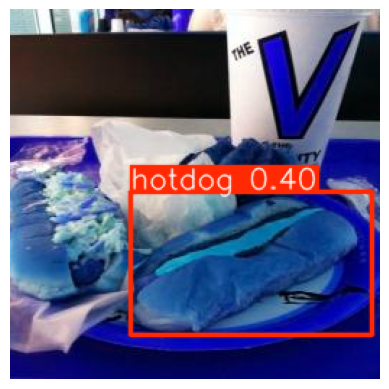

In [ ]:
# Run prediction on your validation image
results = model.predict(source=val_image, conf=0.25, save=True)

# Visualize results with bounding boxes
from matplotlib import pyplot as plt

# results[0].plot() returns an image (numpy array) with boxes drawn
plt.imshow(results[0].plot())
plt.axis("off")
plt.show()
